# Heart Disease with Machine Learning 

In [ ]:
# Loaading Data
import pandas as pd
import numpy as np
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# EDA
from ydata_profiling import ProfileReport
# Statistics Analysis
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency, pearsonr
# Data Preprocessing
from sklearn.preprocessing import StandardScaler
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Ensembling
from mlxtend.classifier import StackingCVClassifier 

In [59]:
# Load the dataset
df = pd.read_csv("../Data/heart.csv")

In [63]:
# Check for missing values
df.isnull().sum()
# Check for duplicates
duplicates = df.duplicated().sum()

In [ ]:
# Check description of the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Check the first few rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
import os

# Ensure Outputs folder exists (go up one level first)
os.makedirs("../Outputs", exist_ok=True)


In [18]:
# Generate and save the report to the correct location
profile = ProfileReport(df, title="Heart Disease Data Profile", explorative=True)
profile.to_file("../Outputs/heart_disease_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 14/14 [00:00<00:00, 11234.03it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Objective:
### This project explores the prevalence (percentage) and incidence (count) of heart disease across various demographic and clinical features, with a focus on sex, cholesterol, age, and thalach.

  ##### Part 1: General Prevalence and Incidence

In [19]:
total = len(df)
disease_cases = df['target'].sum()
prevalence_total = (disease_cases / total) * 100

print(f"Total Patients: {total}")
print(f"Heart Disease Cases: {disease_cases} ({prevalence_total:.1f}%)")

Total Patients: 303
Heart Disease Cases: 165 (54.5%)


##### Part 2: Prevalence and Incidence by Sex

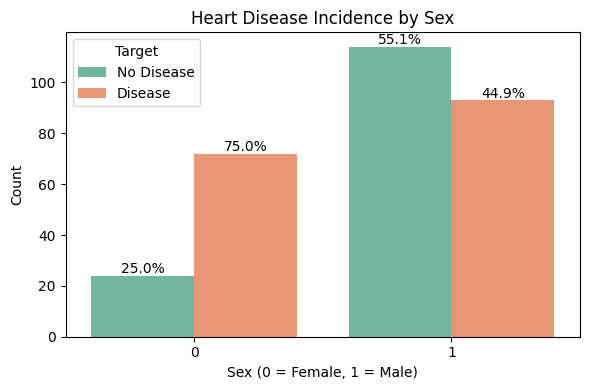

Chi-square test between sex and disease: chi2 = 22.72, p = 0.0000


In [ ]:
# Group and calculate prevalence
sex_counts = df.groupby(['sex', 'target'], observed=True).size().reset_index(name='count')
sex_totals = df['sex'].value_counts().sort_index()
sex_counts['prevalence'] = sex_counts.apply(lambda row: (row['count'] / sex_totals[row['sex']]) * 100, axis=1)

# Plot
%matplotlib inline
plt.figure(figsize=(6, 4))
barplot = sns.barplot(
    x='sex',
    y='count',
    hue='target',
    data=sex_counts,
    palette=['#66c2a5', '#fc8d62'])

# Get handles & labels from Seaborn plot
handles, labels = barplot.get_legend_handles_labels()
plt.legend(handles=handles[:2], labels=['No Disease', 'Disease'], title='Target', loc='best')

# Labels and title
plt.title("Heart Disease Incidence by Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")

# Add prevalence % on bars
for index, row in sex_counts.iterrows():
    x_offset = -0.2 + (row['target'] * 0.4)
    plt.text(row['sex'] + x_offset, row['count'] + 1, f"{row['prevalence']:.1f}%", ha='center')

plt.tight_layout()
plt.show()

# Chi-square test
chi2, p, _, _ = chi2_contingency(pd.crosstab(df['sex'], df['target']))
print(f"Chi-square test between sex and disease: chi2 = {chi2:.2f}, p = {p:.4f}")

##### Part 3: Prevalence vs. Incidence by Feature Group and Sex

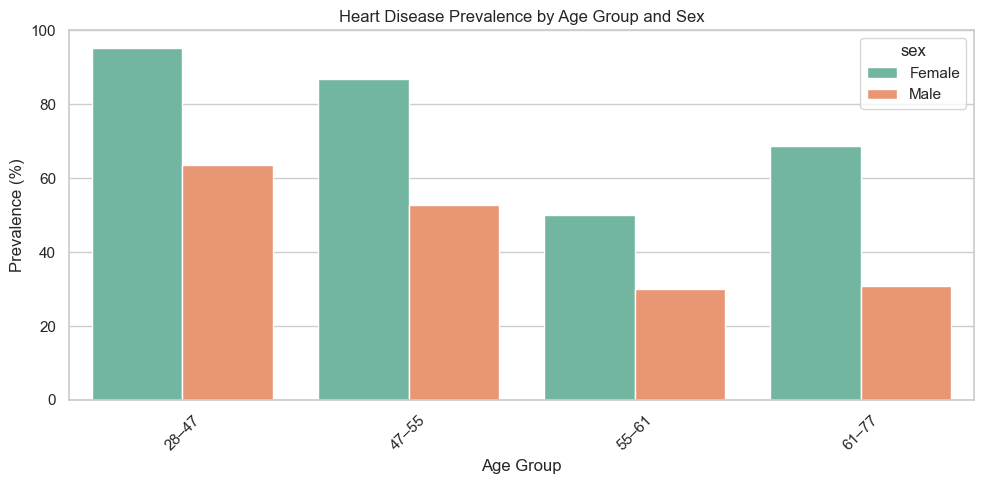

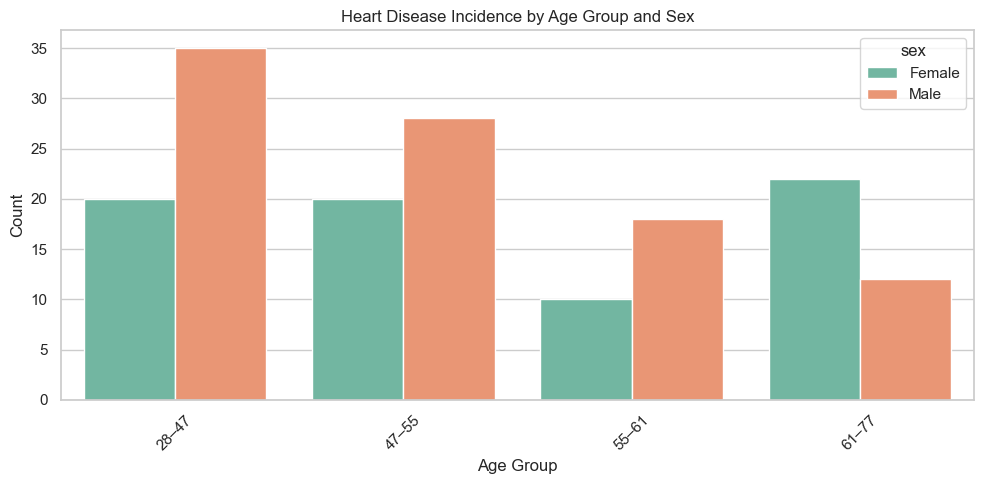

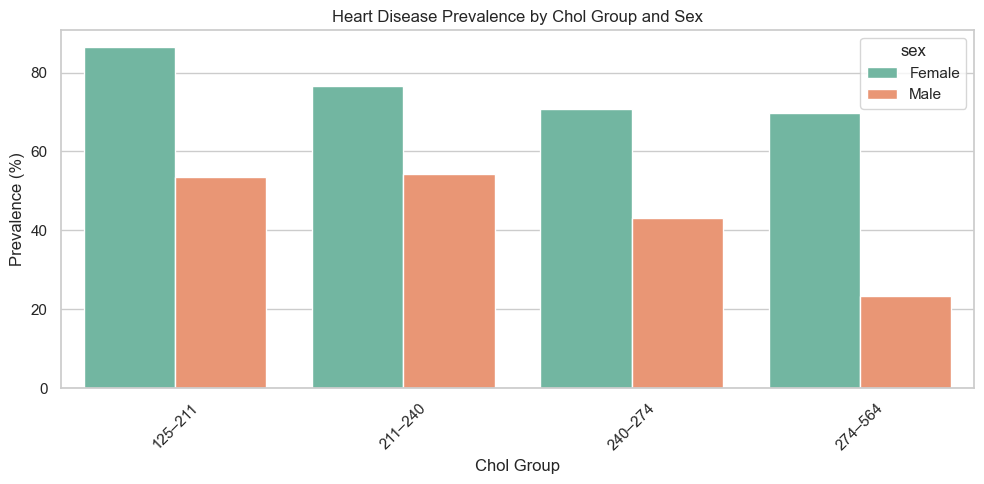

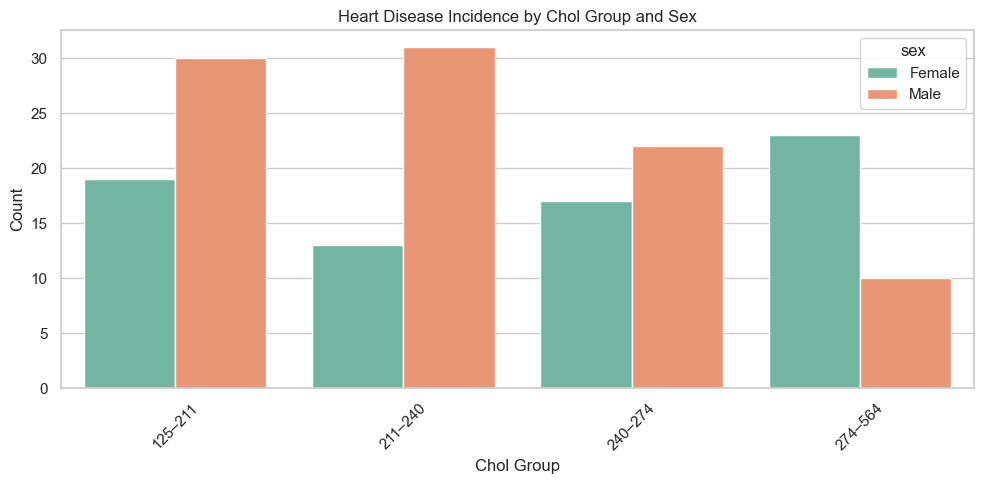

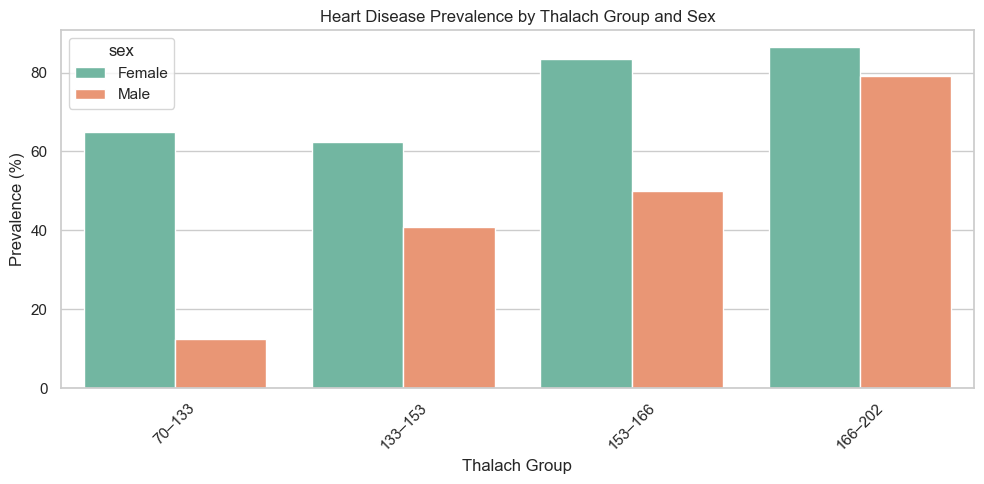

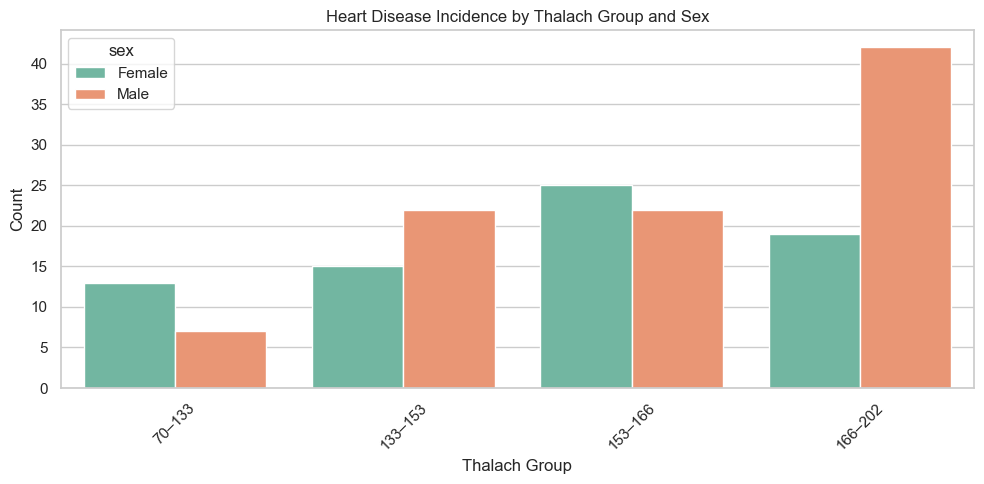

In [44]:
# Suppress specific RuntimeWarnings (if any remain after fixing NaNs)
import warnings
# Suppress warnings related to NaN values in calculations
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Features to analyze
features = ['age', 'chol', 'thalach']

# Drop rows with NaNs in key columns to avoid issues
df = df.dropna(subset=features + ['sex', 'target'])

# Map sex labels
sex_labels = {0: 'Female', 1: 'Male'}

for feature in features:
    # Bin the feature into quartiles
    df[f'{feature}_bin'] = pd.qcut(df[feature], q=4, duplicates='drop')

    # Extract bin edges and convert to custom integer-labeled categories
    bin_edges = df[f'{feature}_bin'].cat.categories
    rounded_labels = [f"{int(interval.left)}–{int(interval.right)}" for interval in bin_edges]

    # Replace labels in the bin column
    df[f'{feature}_bin'] = pd.cut(df[feature], bins=[interval.left for interval in bin_edges] + [bin_edges[-1].right], labels=rounded_labels, include_lowest=True)

    # Group by binned feature, sex, and target
    grp = df.groupby([f'{feature}_bin', 'sex', 'target'], observed=True).size().reset_index(name='count')
    totals = df.groupby([f'{feature}_bin', 'sex'], observed=True).size().reset_index(name='total')

    # Merge for prevalence calculation
    merged = pd.merge(grp, totals, on=[f'{feature}_bin', 'sex'])
    merged['prevalence'] = (merged['count'] / merged['total']) * 100
    merged['sex'] = merged['sex'].map(sex_labels)

    # Plot prevalence
    plt.figure(figsize=(10, 5))
    sns.barplot(
        x=f'{feature}_bin',
        y='prevalence',
        hue='sex',
        data=merged[merged['target'] == 1],
        palette=['#66c2a5', '#fc8d62']
    )
    plt.title(f"Heart Disease Prevalence by {feature.capitalize()} Group and Sex")
    plt.ylabel("Prevalence (%)")
    plt.xlabel(f"{feature.capitalize()} Group")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot raw count
    plt.figure(figsize=(10, 5))
    sns.barplot(
        x=f'{feature}_bin',
        y='count',
        hue='sex',
        data=merged[merged['target'] == 1],
        palette=['#66c2a5', '#fc8d62']
    )
    plt.title(f"Heart Disease Incidence by {feature.capitalize()} Group and Sex")
    plt.ylabel("Count")
    plt.xlabel(f"{feature.capitalize()} Group")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [45]:
# Model Preparation Section

# Define target and features
# Drop target and binned features from input matrix X
binned_features = [f'{f}_bin' for f in features]  # List of bin columns like 'age_bin', etc.
X = df.drop(columns=['target'] + binned_features)
y = df['target']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # ensures class balance in train/test sets
)

# Feature scaling (standardize numeric features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Logistic Regression

# Initialize the model with increased max_iter for convergence
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on scaled training data
log_model.fit(X_train_scaled, y_train)

# Predict on scaled test data
y_pred_log = log_model.predict(X_test_scaled)

#Print the report
print("\n Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))


 Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



In [49]:
# Naive Bayes

# Initialize Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model on scaled training data
nb_model.fit(X_train_scaled, y_train)

# Predict on the scaled test set
y_pred_nb = nb_model.predict(X_test_scaled)

# Print classification report for Naive Bayes
print("\n Naive Bayes Report:")
print(classification_report(
    y_test,
    y_pred_nb,
    target_names=['No Disease', 'Disease']
))



 Naive Bayes Report:
              precision    recall  f1-score   support

  No Disease       0.87      0.71      0.78        28
     Disease       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



In [54]:
# Random Forest

# Initialize Random Forest with fixed random state for reproducibility
rf_model = RandomForestClassifier(random_state=42)

# Train the model on unscaled data (Random Forest doesn't need scaling)
rf_model.fit(X_train, y_train)

# Predict class labels on the test set
y_pred_rf = rf_model.predict(X_test)

# Print classification report
print("\n Random Forest Report:")
print(classification_report(
    y_test,
    y_pred_rf,
    target_names=['No Disease', 'Disease']
))


 Random Forest Report:
              precision    recall  f1-score   support

  No Disease       0.95      0.68      0.79        28
     Disease       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61



In [56]:
# Ensemble - Voting Classifier

# Initialize the Voting Classifier using soft voting (based on predicted probabilities)
ensemble = VotingClassifier(
    estimators=[
        ('lr', log_model),   # Logistic Regression
        ('nb', nb_model),    # Naive Bayes
        ('rf', rf_model)     # Random Forest
    ],
    voting='soft'  # Soft voting uses predicted probabilities (better when models are calibrated)
)

# Train the ensemble model on the scaled training data
ensemble.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_ensemble = ensemble.predict(X_test_scaled)

# Evaluate and print classification report
print("\n Ensemble Model Report:")
print(classification_report(
    y_test,
    y_pred_ensemble,
    target_names=['No Disease', 'Disease']
))


 Ensemble Model Report:
              precision    recall  f1-score   support

  No Disease       0.90      0.68      0.78        28
     Disease       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61

